# Линейная регрессия

Чтение данных из файла

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# из библиотеки google.colab импортируем класс files
from google.colab import files

# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving student_scores.csv to student_scores.csv


In [7]:
data = pd.read_csv('student_scores.csv')
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


Cтатистическая информация об используемых данных (количество, min, max, среднее) по каждому из столбцов

In [8]:
# Вывести статистическую информацию о данных
statistics = data.describe()

print(statistics)

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


Изображение исходных точек

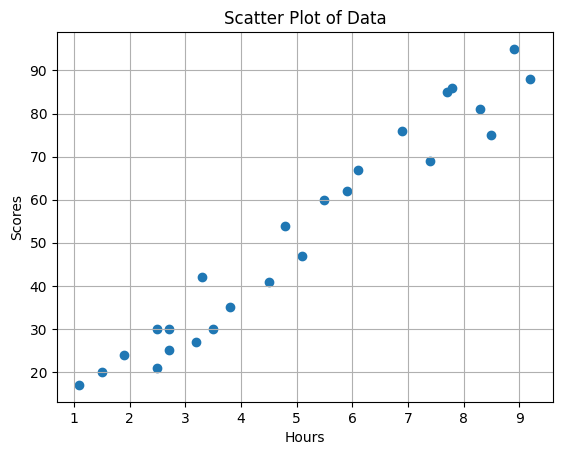

In [9]:
plt.scatter(data['Hours'], data['Scores'])  # Предположим, что 'x' и 'y' - это названия столбцов с координатами
plt.xlabel('Hours')  # Подпись оси X
plt.ylabel('Scores')  # Подпись оси Y
plt.title('Scatter Plot of Data')  # Заголовок графика
plt.grid()
plt.show()

Вычисление параметров регрессионной прямой, при которых функция ошибки принимает минимальное значение

In [10]:
def regression_coefficients(x, y):
  n = len(x)

  num_w1 = (sum(x[i]*np.sum(y) for i in range (n))/n - sum((y[i]*x[i]) for i in range (n)))
  denom_w1 = (sum(x[i]*np.sum(x) for i in range (n))/n - sum(pow(x[i],2) for i in range (n)))
  w1 = num_w1/denom_w1
  w0 = (np.sum(y) - w1*np.sum(x))/n

  return w0, w1

In [11]:
def choose_target_indicator(x, y, data, user_input):

  if (user_input == 'S'):
    x = np.array(data["Hours"])
    y = np.array(data["Scores"])
  else:
    y = np.array(data["Hours"])
    x = np.array(data["Scores"])

  return x, y

In [57]:
user_input = input("Введите выбранный столбец Y - [H]ours/[S]cores: ")
while (user_input != 'H' and user_input != 'S'):
  input("Введите выбранный столбец Y - [H]ours/[S]cores: ")
x = np.array(data["Hours"])
y = np.array(data["Scores"])
x, y = choose_target_indicator(x, y, data, user_input)

Введите выбранный столбец Y - [H]ours/[S]cores: H


In [58]:
intersept, slope = regression_coefficients(x, y)
print('Интерсепт: {:.4f}'.format(intersept))
print('Производная: {:.4f}'.format(slope))

Интерсепт: -0.0063
Производная: 0.0975


Оценка качества апроксимирующей функции методом наименьших
квадратов

In [59]:
Err = sum(y[i] - intersept - slope*x[i] for i in range (len(x)))/len(x)
print(Err)

3.552713678800501e-16


In [60]:
def f(x, w0, w1):
  return w0 + w1*x

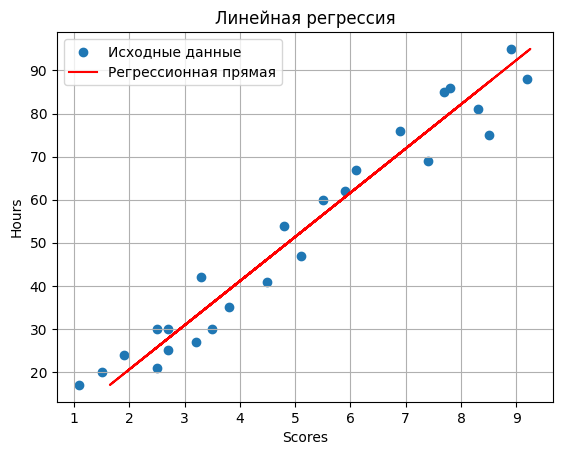

In [61]:
# Построение графика
plt.scatter(y, x, label='Исходные данные')
plt.plot(f(x, intersept, slope), x,  color='red', label='Регрессионная прямая')
plt.title('Линейная регрессия')
if (user_input == 'H'):
  plt.xlabel('Scores')  # Подпись оси X
  plt.ylabel('Hours')
else:
  plt.xlabel('Hours')  # Подпись оси X
  plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

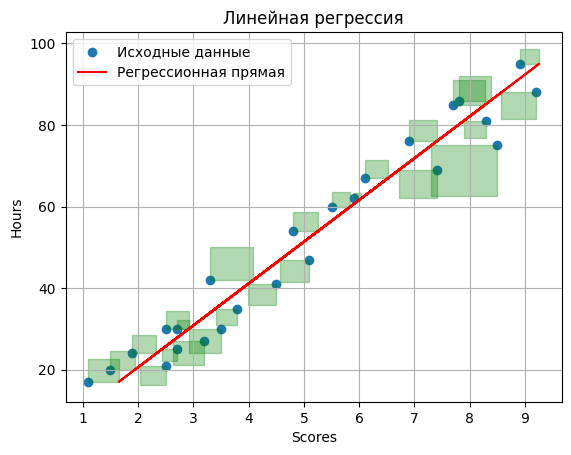

In [62]:
# Построение графика
plt.scatter(y, x, label='Исходные данные')
plt.plot(f(x, intersept, slope), x,  color='red', label='Регрессионная прямая')
plt.title('Линейная регрессия')
if (user_input == 'H'):
  plt.xlabel('Scores')  # Подпись оси X
  plt.ylabel('Hours')
  divider = data['Scores'].max()/data['Hours'].max()
else:
  plt.xlabel('Hours')  # Подпись оси X
  plt.ylabel('Scores')
  divider = data['Hours'].max()/data['Scores'].max()

# Добавляем квадраты ошибок как квадраты на графике
for i in range(len(x)):
    if f(x[i], intersept, slope) > y[i]:# Точки над линией
            rect = plt.Rectangle((f(x[i], intersept, slope), x[i]), y[i] - f(x[i], intersept, slope), (f(x[i], intersept, slope)-y[i])*divider, color='green', alpha=0.3)
    else:# Точки под линией
            rect = plt.Rectangle((f(x[i], intersept, slope),  x[i]), y[i] - f(x[i], intersept, slope), (f(x[i], intersept, slope)-y[i])*divider, color='green', alpha=0.3)

    plt.gca().add_patch(rect)

plt.legend()
plt.grid(True)
plt.show()